In [19]:
from pathlib import Path
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import ipywidgets as widgets

def load_point_cloud(path: Path) -> np.ndarray:
    assert path.is_absolute() and path.exists()
    ply = o3d.io.read_point_cloud(str(path))
    return np.asarray(ply.points)

In [20]:
a = load_point_cloud(Path("./bunny/reconstruction/bun_zipper_res2.ply").resolve())

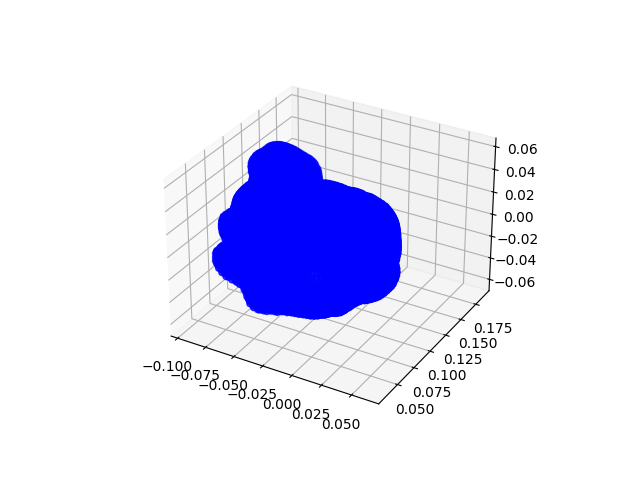

In [24]:
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(a[:,0],a[:,1],a[:,2], marker = 'o', color="b")

In [23]:
def show_widgets():
    # アニメーション制御
    play = widgets.Play(
        value=50,
        min=1,
        max=100,
        step=1,
        interval=500,  # 更新間隔 (ミリ秒)
        description="play:",
    )
    slider = widgets.IntSlider(value=50, min=1, max=100, description='slider:')
    output = widgets.Output(layour={'border': '1px solid black'})

    # ウィジェットの値を連動させる
    widgets.jslink((play, 'value'), (slider, 'value'))

    @output.capture(clear_output=True)
    def on_value_change(slider_value: int) -> None:
        print(f'value changed: {slider_value=}')

    widgets.interactive(on_value_change, slider_value=slider)
    display(play, slider, output)

show_widgets()

Play(value=50, description='play:', interval=500, min=1)

IntSlider(value=50, description='slider:', min=1)

Output()